sources



1 Additional feature to analyse:
Methane levels 800k years
sea ice coverage 
total solar irradiance


read up:

Frequency analysis
Linear regression

Global GDP (https://ourworldindata.org/grapher/world-gdp-over-the-last-two-millennia?time=1900..latest)
Global population: (https://www.worldometers.info/world-population/world-population-by-year/)



FFT Function Fast Furier Transform for frequency analysis
https://www.youtube.com/watch?v=arYKpiVACvY
https://www.youtube.com/watch?v=sa7E9qUHYXw

Climate Change: Atmospheric Carbon Dioxide (https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

CArbon Tracker video:(https://www.youtube.com/watch?v=I7jKxO4nKZc)

(check data from papers by Parrenin et al. 2013; Snyder et al. 2016, Bereiter et al. 2015)

IPCC report 2023:
https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_FullVolume.pdf

Citable Glossary : chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_AnnexesIndex.pdf

python:
Time series analysis and precidction: (https://www.youtube.com/watch?v=ilw2AnNsbIc)
Time series: (https://www.youtube.com/watch?v=huNTC4Zw2S8)



## set environment, import modules

In [97]:
import pandas as pd
# Successfully installed xlrd-2.0.1
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

### Import CO2_Luthi_et_al._2008_Nature (composite CO2) and EPICA Dome C Ice Core (Temperature)


In [98]:
# Import Excel ref: https://datatofish.com/read_excel/
# skiprows: https://www.statology.org/pandas-read-excel-skip-rows/
dfCO2 = pd.read_excel("Data\CO2_Luthi_et_al._2008_Nature.xls", sheet_name="3.  Composite CO2", skiprows=6)
dfCO2.head()

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [99]:
dfCO2.columns

Index(['EDC3_gas_a (yr)', 'CO2 (ppmv)'], dtype='object')

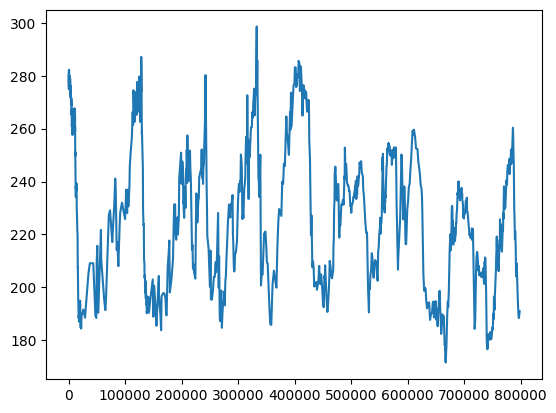

In [100]:
plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])

In [101]:
# read in temperature

#read in text data separated with multiple spaces (ref: https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas)
dfTemperature = pd.read_csv('Data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91)
dfTemperature.head()

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN


In [102]:
dfTemperature.columns

Index(['Bag', 'ztop', 'Age', 'Deuterium', 'Temperature'], dtype='object')

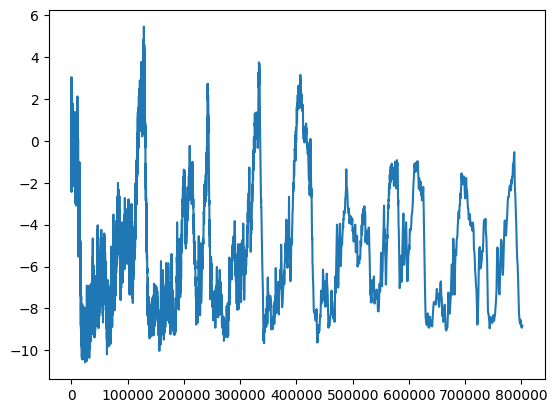

In [103]:
plt.plot(dfTemperature['Age'],dfTemperature['Temperature'])

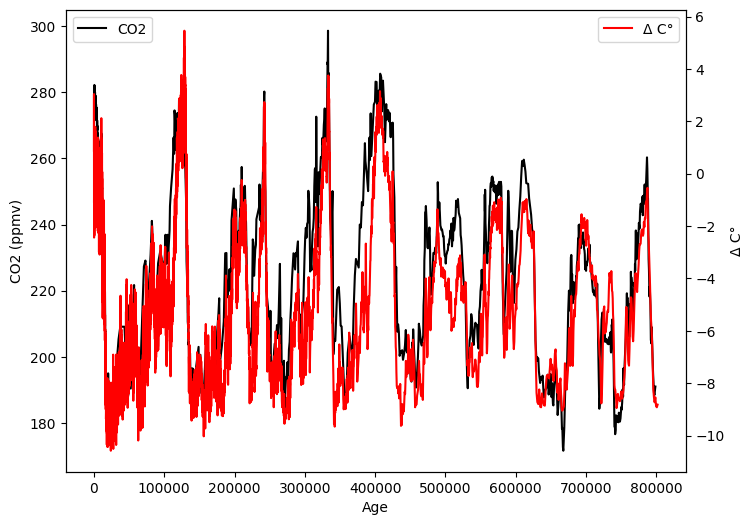

In [136]:
#Overlay

#Dual axis (ref: https://python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib/)

fig, ax1 = plt.subplots(figsize=(8,6))
ax2=ax1.twinx()


ax1.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'],color='black', label='CO2')
ax2.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r',label='Δ C°')
ax1.set_ylabel('CO2 (ppmv)')  # Set y-axis label
ax2.set_ylabel('Δ C°')  # Set y-axis label
ax1.set_xlabel('Age')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.legend()
plt.show()


#plt.plot(dfCO2['EDC3_gas_a (yr)'], dfCO2['CO2 (ppmv)'])
#plt.plot(dfTemperature['Age'],dfTemperature['Temperature'],color='r')

#Import and overlay the different CO2 source data

In [147]:
# Import specific range of Excel in Python (ref: https://www.analytics-tuts.com/import-specific-range-of-excel-in-python/)

# Data collected and compiled into one excel file by Lecturer: Brian McGinley
# Excel ranges point to columns: 'Gasage (EDC3, yr BP)' or equivalent & 'CO2 (ppmv)'

df_0_22 = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='B,D',skiprows=6).dropna() # University of Bern, Dome C (0-22 kyr BP) - Monnin et al. (2001+2004)
df_0_440= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='G,I',skiprows=6).dropna() # LGGE Grenoble, Vostok (0-440 kyr BP) - Petit et al. (1999), Pepin et al. (2001), Raynaud et al. (2005)
df_19_63= pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='K,L',skiprows=6).dropna() # University of Bern, Taylor Dome (19-63 kyr BP), Indermühle et al. (2000)
df_393_664=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='O,Q',skiprows=6).dropna() # University of Bern, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_393_664_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='T,V',skiprows=6).dropna() # LGGE Grenoble, Dome C (393-664 kyr BP), Siegenthaler et al. (2005)
df_611_800=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='X,Z',skiprows=6).dropna() # University of Bern, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_611_800_lgge=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AC,AE',skiprows=6).dropna() # LGGE Grenoble, Dome C (611-800 kyr BP), Lüthi et al. (2008)
df_35_68=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AI,AJ',skiprows=6).dropna() # University of Bern, Talos Dome (35-68 kyr BP), Bereiter et al. (2012)
df_49_115=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AM,AO',skiprows=6).dropna() # University of Bern, EDML (49-115 kyr BP), Bereiter et al. (2012) [1], Lüthi et al. (2010) [2]
df_19_88=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AS,AU',skiprows=6).dropna() # Oregon State University, Byrd (19-88 kyr BP), Ahn et al. (2008)
df_9_22=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='AX,AZ',skiprows=6).dropna() # LGGE Grenoble, Byrd (19-88 kyr BP), Lourantou et al. (2010, a) (Global Biogeochemical Cycles)
df_125_153=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BC,BE',skiprows=6).dropna() # LGGE Grenoble, EDC (125- 153 kyr BP), Lourantou et al. (2010, b) (Quaternary Science Reviews)
df_12_24=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BH,BJ',skiprows=6).dropna() # University of Bern, EDC (12-24 kyr BP), Schmitt et al. (2011)
df_105_155=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BM,BO',skiprows=6).dropna() # University of Bern, EDC (105-155 kyr BP), Schneider et al. (2013)
df_0_2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BQ,BR',skiprows=6).dropna() # CSIRO Australia, Law Dome (0-2 kyr BP), MacFarling Meure et al. (2006)
df_0_6=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='BY,BZ',skiprows=6).dropna() # University of Bern, EDML (0-6 kyr BP), Monnin et al. (2004) [1], Siegenthaler et al. (2005) [2]
df_0_2_CSIRO2=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CF,CG',skiprows=6).dropna() # CSIRO Australia, Law Dome and South Pole (0-2 kyr BP), Rubino et al. (2013)
df_20_40=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CL,CM',skiprows=6).dropna() # Oregon State University, Siple Dome (20-40 kyr BP), Ahn et al. (2014, a) (Nature Communications)
df_7_9=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CP,CR',skiprows=6).dropna() # Oregon State University, Siple Dome (7.3 - 9 kyr BP), Ahn et al. (2014, b) (Geophysical Research Letters)
df_9_23=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CU,CV',skiprows=6).dropna() # Oregon State University, WAIS (9-23 kyr BP), Marcott et al. (2014)
df_560_806=pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="all records", usecols='CY,CZ',skiprows=6).dropna() # University of Bern, EDC (560-806 kyr, corrected for analytical bias), Bereiter et al. (2014)

df_9_23.tail()



,"Gasage (WDC06A-7, yr BP).1",CO2 (ppmv).19
318,22747.990,195.236731
319,22840.574,199.996104
320,22921.805,199.965249
321,22962.308,198.936384
322,23029.978,197.553380


In [149]:
#concatenate dataframes
dataframes = [df_0_22, df_0_440, df_19_63, df_393_664, df_393_664_lgge, df_611_800, df_611_800_lgge, df_35_68, df_49_115,
df_19_88,df_9_22,df_125_153,df_12_24,df_105_155,df_0_2,df_0_6,df_0_2_CSIRO2,df_20_40,df_7_9,df_9_23,df_560_806,]

merged_df = pd.DataFrame()

for df in dataframes:
    df.columns = ['Age', 'CO2']
    merged_df = pd.concat([merged_df, df], axis=0, ignore_index=True)

merged_df = merged_df.sort_values(by='Age')
#len(dataframes)#check if I have them all

21

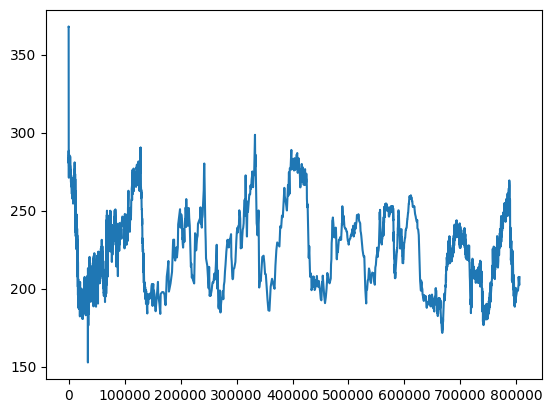

In [150]:
plt.plot(merged_df['Age'],merged_df['CO2'])

In [153]:
dfCO2_compo = pd.read_excel("Data/CO2_IPCC_Report.xls", sheet_name="CO2 Composite", skiprows=14) # other source
dfCO2_compo.columns

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

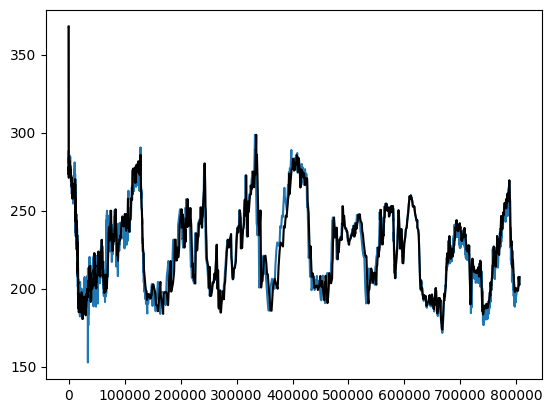

In [155]:
plt.plot(merged_df['Age'],merged_df['CO2'])
plt.plot(dfCO2_compo['Gasage (yr BP) '],dfCO2_compo['CO2 (ppmv)'], color='#000000')

In [ ]:
# folytatas az összefűzött plottal

linecolors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5", 
    "#ad494a"
]
